In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
cols_to_keep = [
    'play_id',
    'game_id',
    'home_team',
    'away_team',
    'posteam',
    'defteam',
    'score_differential',
    'score_differential_post',
    'qtr',
    'game_seconds_remaining',
    'sp'
]

all_pbp = pd.read_csv('../data/processed/pbp_since_2017.csv', usecols=cols_to_keep)

In [33]:
# remove overtime
print(f'rows before: {all_pbp.shape[0]}')
df = all_pbp[all_pbp['qtr'] != 5]
print(f'rows after: {df.shape[0]}')

rows before: 314851
rows after: 312635


In [34]:
# only Jets games
print(f'rows before: {df.shape[0]}')
df_jets = df[(df['home_team'] == 'NYJ') | (df['away_team'] == 'NYJ')]
print(f'rows after: {df_jets.shape[0]}')

rows before: 312635
rows after: 18658


In [55]:
# add column for Jets score differential

df_jets['jets_score_diff_pre'] = np.where(df_jets['posteam'] == 'NYJ', df_jets['score_differential'], df_jets['score_differential'] * (-1))
df_jets['jets_score_diff_post'] = np.where(df_jets['posteam'] == 'NYJ', df_jets['score_differential_post'], df_jets['score_differential_post'] * (-1))

df_jets['jets_in_lead_pre'] = np.where(df_jets['jets_score_diff_pre'] > 0, 1, 0)
df_jets['jets_in_lead_post'] = np.where(df_jets['jets_score_diff_post'] > 0, 1, 0)

df_jets.dropna(subset=['score_differential'], inplace=True)

# df_jets['jets_score_differential'] = np.where(df_jets['pos_team'] == 'NYJ', df_jets['total_home_score'], df_jets['total_away_score'])
# df_jets['opponent_score'] = np.where(df_jets['home_team'] != 'NYJ', df_jets['total_home_score'], df_jets['total_away_score'])
# df_jets.head(n=1000)

/tmp/ipykernel_7761/4124364506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jets['jets_score_diff_pre'] = np.where(df_jets['posteam'] == 'NYJ', df_jets['score_differential'], df_jets['score_differential'] * (-1))
/tmp/ipykernel_7761/4124364506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jets['jets_score_diff_post'] = np.where(df_jets['posteam'] == 'NYJ', df_jets['score_differential_post'], df_jets['score_differential_post'] * (-1))
/tmp/ipykernel_7761/4124364506.py:6: SettingWithCopyWar

In [56]:
game_ids = df_jets['game_id'].unique()
print(game_ids)

['2017_01_NYJ_BUF' '2017_02_NYJ_OAK' '2017_03_MIA_NYJ' '2017_04_JAX_NYJ'
 '2017_05_NYJ_CLE' '2017_06_NE_NYJ' '2017_07_NYJ_MIA' '2017_08_ATL_NYJ'
 '2017_09_BUF_NYJ' '2017_10_NYJ_TB' '2017_12_CAR_NYJ' '2017_13_KC_NYJ'
 '2017_14_NYJ_DEN' '2017_15_NYJ_NO' '2017_16_LAC_NYJ' '2017_17_NYJ_NE'
 '2019_01_BUF_NYJ' '2019_02_CLE_NYJ' '2019_03_NYJ_NE' '2019_05_NYJ_PHI'
 '2019_06_DAL_NYJ' '2019_07_NE_NYJ' '2019_08_NYJ_JAX' '2019_09_NYJ_MIA'
 '2019_10_NYG_NYJ' '2019_11_NYJ_WAS' '2019_12_OAK_NYJ' '2019_13_NYJ_CIN'
 '2019_14_MIA_NYJ' '2019_15_NYJ_BAL' '2019_16_PIT_NYJ' '2019_17_NYJ_BUF'
 '2018_01_NYJ_DET' '2018_02_MIA_NYJ' '2018_03_NYJ_CLE' '2018_04_NYJ_JAX'
 '2018_05_DEN_NYJ' '2018_06_IND_NYJ' '2018_07_MIN_NYJ' '2018_08_NYJ_CHI'
 '2018_09_NYJ_MIA' '2018_10_BUF_NYJ' '2018_12_NE_NYJ' '2018_13_NYJ_TEN'
 '2018_14_NYJ_BUF' '2018_15_HOU_NYJ' '2018_16_GB_NYJ' '2018_17_NYJ_NE'
 '2020_01_NYJ_BUF' '2020_02_SF_NYJ' '2020_03_NYJ_IND' '2020_04_DEN_NYJ'
 '2020_05_ARI_NYJ' '2020_06_NYJ_MIA' '2020_07_BUF_NYJ' '2020_0

In [57]:
# create a series that has a row for each second of a 60 minute NFL football game

game_seconds = 3600
game_df = pd.DataFrame({'second': range(game_seconds)})

In [58]:
# create column that represents the number of seconds since the start of the game
df_jets['seconds_since_start'] = 3600 - df_jets['game_seconds_remaining']

/tmp/ipykernel_7761/3804185075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jets['seconds_since_start'] = 3600 - df_jets['game_seconds_remaining']


In [59]:
jets_eagles = df_jets[df_jets['game_id'] == '2023_06_PHI_NYJ']



In [60]:
jets_eagles

,play_id,game_id,home_team,away_team,posteam,defteam,game_seconds_remaining,sp,qtr,score_differential,score_differential_post,jets_score_diff_pre,jets_score_diff_post,seconds_since_start,jets_in_lead_pre,jets_in_lead_post
208027,39.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,3600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
208028,55.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,3600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
208029,78.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,3597.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0,0
208030,100.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,3564.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0,0
208031,134.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,3559.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208193,4363.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,94.0,0.0,4.0,-6.0,-6.0,6.0,6.0,3506.0,1,1
208195,4388.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,84.0,0.0,4.0,-6.0,-6.0,6.0,6.0,3516.0,1,1
208196,4418.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,76.0,0.0,4.0,6.0,6.0,6.0,6.0,3524.0,1,1
208197,4440.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,37.0,0.0,4.0,6.0,6.0,6.0,6.0,3563.0,1,1


In [61]:
jets_eagles[jets_eagles['sp'] == 1].head(n=100)

,play_id,game_id,home_team,away_team,posteam,defteam,game_seconds_remaining,sp,qtr,score_differential,score_differential_post,jets_score_diff_pre,jets_score_diff_post,seconds_since_start,jets_in_lead_pre,jets_in_lead_post
208054,753.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,2888.0,1.0,1.0,0.0,6.0,-0.0,-6.0,712.0,0,0
208055,817.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,2884.0,1.0,1.0,6.0,7.0,-6.0,-7.0,716.0,0,0
208070,1245.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,2595.0,1.0,2.0,-7.0,-4.0,-7.0,-4.0,1005.0,0,0
208088,1741.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,2138.0,1.0,2.0,4.0,10.0,-4.0,-10.0,1462.0,0,0
208089,1767.0,2023_06_PHI_NYJ,NYJ,PHI,PHI,NYJ,2132.0,1.0,2.0,10.0,11.0,-10.0,-11.0,1468.0,0,0
208098,1986.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,1954.0,1.0,2.0,-11.0,-8.0,-11.0,-8.0,1646.0,0,0
208115,2401.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,1802.0,1.0,2.0,-8.0,-5.0,-8.0,-5.0,1798.0,0,0
208149,3296.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,948.0,1.0,3.0,-5.0,-2.0,-5.0,-2.0,2652.0,0,0
208188,4265.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,110.0,1.0,4.0,-2.0,4.0,-2.0,4.0,3490.0,0,1
208189,4288.0,2023_06_PHI_NYJ,NYJ,PHI,NYJ,PHI,106.0,1.0,4.0,4.0,6.0,4.0,6.0,3494.0,1,1


/home/jagord24/anaconda3/envs/nflstats/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jagord24/anaconda3/envs/nflstats/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jagord24/anaconda3/envs/nflstats/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jagord24/anaconda3/envs/nflstats/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Axes: xlabel='seconds_since_start', ylabel='jets_score_diff_post'>

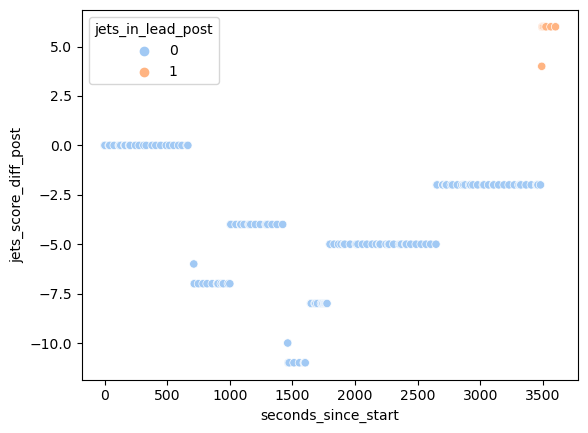

In [72]:
# create sns scatterpreplot of score differential over time with the x axis being the seconds_since_start and y axis being jets_score_diff_post. I want it to be colored by whether the jets are in the lead or not.
# i want the color scheme to match the new york jets colors but instead of white, it should be a grey

# sns.scatterplot(data=jets_eagles, x='seconds_since_start', y='jets_score_diff_post', hue = 'jets_in_lead_post', palette=['#203731', '#ffffff'], legend=False)

sns.scatterplot(data=jets_eagles, x='seconds_since_start', y='jets_score_diff_post', hue = 'jets_in_lead_post', palette='pastel')

In [73]:
game_id = ''
team_abbreviation = ''

In [ ]:
def get_team_data(team_abbreviation, pbp_df):
    team_df = pbp_df[df_jets['posteam'] == team_abbreviation]
    return team_df